## Homework №1

### Poisson distribution

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import poisson
import scipy
import seaborn as sb
import numpy as np
np.random.seed(seed=42)
SIZE = 10000
MIN_FREQ = 4
mu_true = 4
mu_false = 24

In [2]:
def theor_poisson(n, k_max):
    return [n * mu_true**(k)*np.exp(-mu_true)/factorial(k) for k in range(k_max)]

def frequencies(f):
    c = dict(Counter(f))
    missed = set(range(len(c))).difference(set(c.keys()))
    for m in missed:
        c[m] = 0
    result = [v for k,v in sorted(c.items())]
    return result

def plot_freqs(f):
    res = frequencies(f)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(range(len(res)), res)
    plt.show()

def prepare_lists(obs, exp):
    cut = 0
    for i in range(len(obs)):
        if obs[i] < MIN_FREQ:
            cut = i
    exp[cut-1] = SIZE - sum(exp[:cut-1])
    return(obs[:cut], exp[:cut])


### Issue 1

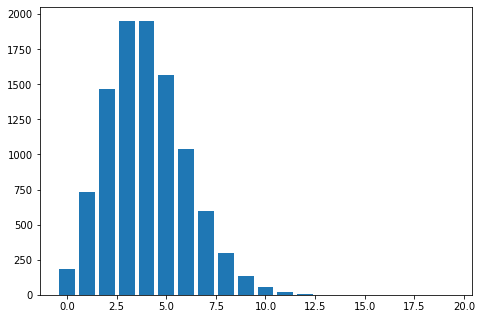

In [3]:
from math import factorial
exp = theor_poisson(SIZE, 100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(20), exp[:20])
plt.show()

# f_exp = poisson.rvs(mu=mu_true, size=SIZE)
# plot_freqs(f_exp, 1)
# exp = frequencies(f_exp)
# # ax = sb.distplot(f_exp,
# #                   kde=True,
# #                   color='green',
# #                   hist_kws={"linewidth": 25,'alpha':1})
# # ax.set(xlabel='Poisson', ylabel='Frequency')

### Issue 2

#### Test the hypothesis that the parameter is equal to a given value. Take correct and incorrect values and compare the test results.

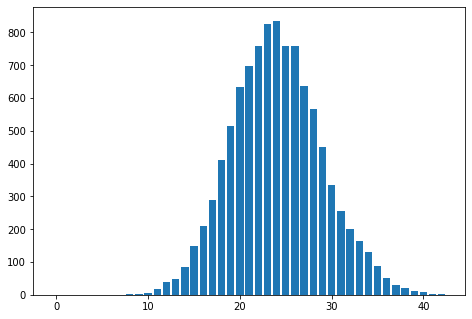

chisq 4.5109981440002724e+23
p_value 0.0


In [4]:
#lambda NOT equal to mu_true
#let assume mu and get expected distribution
f_obs = poisson.rvs(mu=mu_false, size=SIZE)
plot_freqs(f_obs)
obs = frequencies(f_obs)

chisq, p = scipy.stats.chisquare(*prepare_lists(obs, exp))

print('chisq', chisq)
print('p_value', p)

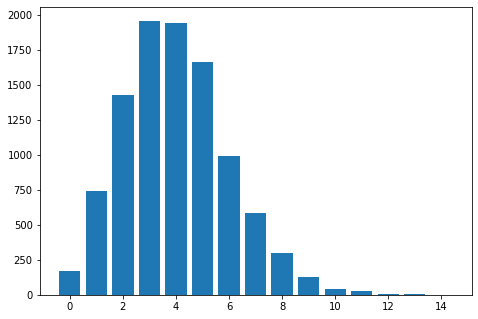

chisq 18.504015064735235
p_value 0.1393027501383256


In [5]:
#lambda equal mu_true
#let assume mu and get expected distribution
f_obs = poisson.rvs(mu=mu_true, size=SIZE)
plot_freqs(f_obs)
obs = frequencies(f_obs)

chisq, p = scipy.stats.chisquare(*prepare_lists(obs, exp))

print('chisq', chisq)
print('p_value', p)

### Homework 2

### Issue 4-7

In [8]:
y0 = np.random.poisson(4, 40)

In [9]:
y0

array([ 3,  3, 10,  5,  5,  5,  4,  2,  4,  6,  5,  6,  5,  5,  4,  2,  6,
        0,  6,  5,  4,  5,  8,  5,  7,  1,  6,  3,  6,  3,  3,  4,  3,  3,
        3,  7,  2,  5,  3,  9])

In [10]:
sum(y0)

181

In [11]:
y = np.random.poisson(3.5, 60)

In [12]:
y

array([2, 5, 3, 3, 1, 8, 0, 3, 6, 2, 3, 2, 9, 4, 1, 5, 4, 2, 4, 3, 2, 4,
       3, 4, 3, 2, 7, 3, 0, 5, 2, 2, 6, 3, 2, 6, 4, 1, 7, 3, 3, 3, 2, 3,
       4, 7, 4, 2, 3, 5, 4, 0, 3, 4, 4, 4, 2, 1, 2, 3])

In [13]:
sum(y)

202

In [14]:
sum(y)/60

3.3666666666666667

### Issue 8-9

### Construct a histogram of the posterior and compare with the histogram of its Gaussian approximation. Generate a sample from posterior

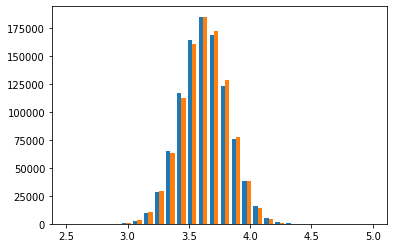

In [15]:
alpha = 363    # alpha
beta = 100  # 1/beta

shape = alpha
scale = 1/beta

s_gamma = np.random.gamma(shape, scale, 1000000)

#mu, std = scipy.stats.norm.fit(s_gamma)
mu = alpha/beta
std = alpha**0.5/beta

s_gauss = np.random.normal(mu, std, 1000000)

plt.hist([s_gamma, s_gauss], bins=28, range=(2.5, 5.0))

plt.show()

In [19]:
q9 = np.random.gamma(shape, scale, 1000)
q9[:20]

array([3.64245582, 3.38607082, 3.43997955, 3.63918907, 3.74397755,
       3.88867096, 3.76815773, 3.57162276, 3.80377978, 3.62949281,
       3.52479273, 3.54160072, 3.41566458, 3.8173512 , 3.8996989 ,
       3.85880425, 3.759029  , 3.5439962 , 3.5653898 , 3.81815729])

In [20]:
mean = np.mean(q9)
median = np.median(q9)
var = np.var(q9)
std = np.std(q9)

In [21]:
print(mean, median, var, std)

3.6310012520758117 3.631603943322643 0.03366699901866622 0.1834856915911053
